# Venn Diagram of the 4 HLA alleles

In [1]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [2]:
#Importing Filtered Files

#Filtered Oktoberfest from MSFragger
#IGC_psm_OK_MSF = pd.read_csv('/home/thinkpad/Metaproteomics/forKarim/OK_MSfragger_filtered/filtered_target_psm_IGC.csv')
sprot_H_psm_OK_MSF = pd.read_csv('/home/sara/Metaproteomics/forKarim/OK_MSfragger_filtered/filtered_target_psm_sprot_H.csv')
sprot_BH_psm_OK_MSF = pd.read_csv('/home/sara/Metaproteomics/forKarim/OK_MSfragger_filtered/filtered_target_psm_sprot_BH.csv')
sprot_all_psm_OK_MSF = pd.read_csv('/home/sara/Metaproteomics/forKarim/OK_MSfragger_filtered/filtered_target_psm_sprot_all.csv')

#Filtered MSBooster
#IGC_psm_MSB = pd.read_csv('/home/sara/Metaproteomics/forKarim/MSBooster conc and filtered/MSBooster conc and filtered/MSB_IGC_filtered.csv')
sprot_H_psm_MSB = pd.read_csv('/home/sara/Metaproteomics/forKarim/MSBooster conc and filtered/MSB_sprot_H_filtered.csv')
sprot_BH_psm_MSB = pd.read_csv('/home/sara/Metaproteomics/forKarim/MSBooster conc and filtered/MSB_sprot_BH_filtered.csv')
sprot_all_psm_MSB = pd.read_csv('/home/sara/Metaproteomics/forKarim/MSBooster conc and filtered/MSB_sprot_all_filtered.csv')




In [3]:
#Unfiltered Oktoberfest from MSFragger
unOK_psm_IGC = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/Unfiltered FDR MSB and OK/IGC_unfiltered_OK.csv")

unOK_psm_sprot_H = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/Unfiltered FDR MSB and OK/sprot_H_unfiltered_OK.csv")

unOK_psm_sprot_BH = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/Unfiltered FDR MSB and OK/sprot_BH_unfiltered_OK.csv")

unOK_psm_sprot_all = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/Unfiltered FDR MSB and OK/sprot_all_unfiltered_OK.csv")


#Unfiltered MSBooster
unMSB_IGC_psm = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/Unfiltered FDR MSB and OK/MSB_IGC_unfiltered.csv")

unMSB_sprot_H_psm = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/Unfiltered FDR MSB and OK/MSB_sprot_H_unfiltered.csv")

unMSB_sprot_BH_psm = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/Unfiltered FDR MSB and OK/MSB_sprot_BH_unfiltered.csv")

unMSB_sprot_all_psm = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/Unfiltered FDR MSB and OK/MSB_sprot_all_unfiltered.csv")

In [23]:
#Meta_sprot_all
perc_sprotA = pd.read_csv("/home/sara/Metaproteomics/forKarim/sprot_all/sprot_all_Oktoberfest_MSFragger/results/percolator/rescore.tab", sep="\t")
perc_sprotA .head()

,SpecId,Label,ScanNr,CID,Charge1,Charge2,Charge3,Charge4,Charge5,Charge6,...,iRT,lda_scores,missedCleavages,modified_cosine,pearson_corr,pred_RT,sequence_length,spectral_angle,Peptide,Protein
0,02405_C04_P025938_B00_A00_R1-3188-FRDEHQK-2-485,1,11530483,0,0,1,0,0,0,0,...,47.514271,-12.637176,1,0.976639,0.895208,82.862620,7,0.753446,_.FRDEHQK._,FRDEHQK
1,02405_C04_P025938_B00_A00_R1-3512-SAEDCM[UNIMO...,1,13218982,0,0,1,0,0,0,0,...,25.580099,-29.033301,0,0.988562,0.763657,-2.501480,7,0.561084,_.SAEDCM[UNIMOD:35]R._,SAEDCM[UNIMOD:35]R
2,02405_C04_P025938_B00_A00_R1-3639-GHMNKGQGHTGR...,-1,12896095,0,0,0,1,0,0,0,...,28.157201,-26.022058,1,0.844023,0.307890,7.457416,12,0.290050,_.GHMNKGQGHTGR._,GHMNKGQGHTGR
3,02405_C04_P025938_B00_A00_R1-3656-NKFHDGPGPSQR...,1,9779934,0,0,0,1,0,0,0,...,20.443085,-29.262714,1,0.956522,-0.023474,-22.385265,12,0.130636,_.NKFHDGPGPSQR._,NKFHDGPGPSQR
4,02405_C04_P025938_B00_A00_R1-3667-GPPGAEPHSTHP...,1,4586170,0,0,0,1,0,0,0,...,18.368563,-17.725195,0,0.956569,0.618799,-30.417416,13,0.487662,_.GPPGAEPHSTHPK._,GPPGAEPHSTHPK


In [25]:
perc_sprotA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181400 entries, 0 to 181399
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   SpecId                                                    181400 non-null  object 
 1   Label                                                     181400 non-null  int64  
 2   ScanNr                                                    181400 non-null  int64  
 3   CID                                                       181400 non-null  int64  
 4   Charge1                                                   181400 non-null  int64  
 5   Charge2                                                   181400 non-null  int64  
 6   Charge3                                                   181400 non-null  int64  
 7   Charge4                                                   181400 non-null  int64  
 8   Char

In [26]:
perc_sprotAll = perc_sprotA [['spectral_angle','pred_RT','sequence_length','Peptide','SpecId']]
perc_sprotAll

,spectral_angle,pred_RT,sequence_length,Peptide,SpecId
0,0.753446,82.862620,7,_.FRDEHQK._,02405_C04_P025938_B00_A00_R1-3188-FRDEHQK-2-485
1,0.561084,-2.501480,7,_.SAEDCM[UNIMOD:35]R._,02405_C04_P025938_B00_A00_R1-3512-SAEDCM[UNIMO...
2,0.290050,7.457416,12,_.GHMNKGQGHTGR._,02405_C04_P025938_B00_A00_R1-3639-GHMNKGQGHTGR...
3,0.130636,-22.385265,12,_.NKFHDGPGPSQR._,02405_C04_P025938_B00_A00_R1-3656-NKFHDGPGPSQR...
4,0.487662,-30.417416,13,_.GPPGAEPHSTHPK._,02405_C04_P025938_B00_A00_R1-3667-GPPGAEPHSTHP...
...,...,...,...,...,...
181395,0.377574,100.017740,15,_.TDLYTLNKC[UNIMOD:4]ELILTK._,02404_F02_P025829_B00_A00_R1-39123-TDLYTLNKC[U...
181396,0.248009,109.589840,12,_.ETVFTHLLSLNK._,02404_F02_P025829_B00_A00_R1-39125-ETVFTHLLSLN...
181397,0.372232,122.647230,10,_.YQEFFSFEIK._,02404_F02_P025829_B00_A00_R1-39126-YQEFFSFEIK-...
181398,0.526452,161.367840,15,_.VSAFIDWIEETIASH._,02404_F02_P025829_B00_A00_R1-39137-VSAFIDWIEET...


In [14]:
sprot_all_psm_OK_MSF
sprot_all_psm_OK_MSF["length"] = sprot_all_psm_OK_MSF['modi_peptide']
sprot_all_psm_OK_MSF

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide,length
0,0,02406_D01_P026011_B00_A00_R1-8145-HYAHVDC[UNIM...,1.379700,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
1,1,02405_E01_P025916_B00_A00_R1-8497-HYAHVDC[UNIM...,1.379700,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
2,2,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.359290,0.000074,6.257380e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
3,3,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.314200,0.000074,1.105390e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
4,4,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,1.263890,0.000074,2.085870e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
...,...,...,...,...,...,...,...,...,...
24583,24583,02405_E01_P025916_B00_A00_R1-33287-IDWWGFR-2-2...,0.000343,0.009883,1.436010e-01,_.IDWWGFR._,IDWWGFR,IDWWGFR,7
24584,24584,02404_F02_P025829_B00_A00_R1-14957-DNSKNSLYLQM...,0.000238,0.009883,1.437570e-01,_.DNSKNSLYLQM[UNIMOD:35]NSLR._,DNSKNSLYLQM[UNIMOD:35]NSLR,DNSKNSLYLQMNSLR,15
24585,24585,02405_E08_P025972_B00_A00_R1-10615-NC[UNIMOD:4...,0.000132,0.009883,1.439120e-01,_.NC[UNIMOD:4]YNLC[UNIMOD:4]R._,NC[UNIMOD:4]YNLC[UNIMOD:4]R,NCYNLCR,7
24586,24586,02404_F02_P025829_B00_A00_R1-5647-YYHDVEK-2-2503,0.000106,0.009883,1.439520e-01,_.YYHDVEK._,YYHDVEK,YYHDVEK,7


In [15]:
sprot_all_psm_OK_MSF["length"].min()

7

In [16]:
sprot_all_psm_MSB
sprot_all_psm_MSB["length"] = sprot_all_psm_MSB['modi_peptide_2'].str.len()
sprot_all_psm_MSB

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,modi_peptide,modi_peptide_2,length
0,0,02404_F02_P025829_B00_A00_R1.15094.15094.3_1,1.102270,0.000358,0.000003,K.VIEHIM[15.9949]EDLDTNADK.Q,VIEHIM[15.9949]EDLDTNADK,VIEHIMEDLDTNADK,15
1,1,02404_F02_P025829_B00_A00_R1.23143.23143.2_1,1.095360,0.000358,0.000003,K.NIFGYQYTIPTHQGR.G,NIFGYQYTIPTHQGR,NIFGYQYTIPTHQGR,15
2,2,02404_F02_P025829_B00_A00_R1.25338.25338.2_1,1.030750,0.000358,0.000007,K.M[15.9949]EEVEAM[15.9949]LLPETLK.R,M[15.9949]EEVEAM[15.9949]LLPETLK,MEEVEAMLLPETLK,14
3,3,02404_F02_P025829_B00_A00_R1.29526.29526.3_1,1.013510,0.000358,0.000008,K.TELVEPTEYLVVHLK.G,TELVEPTEYLVVHLK,TELVEPTEYLVVHLK,15
4,4,02404_F02_P025829_B00_A00_R1.8209.8209.4_1,0.962447,0.000358,0.000013,R.HYAHVDC[57.0215]PGHADYVK.N,HYAHVDC[57.0215]PGHADYVK,HYAHVDCPGHADYVK,15
...,...,...,...,...,...,...,...,...,...
25875,95031,02406_G01_P026014_B00_A00_R1.17543.17543.2_1,-0.001293,0.009909,0.141652,K.IVYGAFER.I,IVYGAFER,IVYGAFER,8
25876,95032,02406_G01_P026014_B00_A00_R1.21270.21270.2_1,-0.001412,0.009909,0.141769,R.WLTM[15.9949]FSR.K,WLTM[15.9949]FSR,WLTMFSR,7
25877,95033,02406_G01_P026014_B00_A00_R1.25585.25585.2_1,-0.001795,0.009909,0.142147,K.VAFDLGLR.K,VAFDLGLR,VAFDLGLR,8
25878,95034,02406_G01_P026014_B00_A00_R1.10963.10963.2_1,-0.001915,0.009909,0.142265,R.YWTQAER.Q,YWTQAER,YWTQAER,7


In [17]:
sprot_all_psm_MSB["length"].max()

15

In [18]:
sprot_all_psm_MSB.head()

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,modi_peptide,modi_peptide_2,length
0,0,02404_F02_P025829_B00_A00_R1.15094.15094.3_1,1.102270,0.000358,0.000003,K.VIEHIM[15.9949]EDLDTNADK.Q,VIEHIM[15.9949]EDLDTNADK,VIEHIMEDLDTNADK,15
1,1,02404_F02_P025829_B00_A00_R1.23143.23143.2_1,1.095360,0.000358,0.000003,K.NIFGYQYTIPTHQGR.G,NIFGYQYTIPTHQGR,NIFGYQYTIPTHQGR,15
2,2,02404_F02_P025829_B00_A00_R1.25338.25338.2_1,1.030750,0.000358,0.000007,K.M[15.9949]EEVEAM[15.9949]LLPETLK.R,M[15.9949]EEVEAM[15.9949]LLPETLK,MEEVEAMLLPETLK,14
3,3,02404_F02_P025829_B00_A00_R1.29526.29526.3_1,1.013510,0.000358,0.000008,K.TELVEPTEYLVVHLK.G,TELVEPTEYLVVHLK,TELVEPTEYLVVHLK,15
4,4,02404_F02_P025829_B00_A00_R1.8209.8209.4_1,0.962447,0.000358,0.000013,R.HYAHVDC[57.0215]PGHADYVK.N,HYAHVDC[57.0215]PGHADYVK,HYAHVDCPGHADYVK,15


### unique peptides of OK

In [58]:
OK_unique= sprot_all_psm_OK_MSF[~sprot_all_psm_OK_MSF['modi_peptide'].isin(sprot_all_psm_MSB['modi_peptide_2'])]
OK_unique.head(20)

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide,length
376,376,02405_E01_P025916_B00_A00_R1-25170-EAYPGDLFYLH...,0.892406,0.000074,0.000002,_.EAYPGDLFYLHSR._,EAYPGDLFYLHSR,EAYPGDLFYLHSR,13
410,410,02405_E08_P025972_B00_A00_R1-24581-EAYPGDLFYLH...,0.882348,0.000074,0.000003,_.EAYPGDLFYLHSR._,EAYPGDLFYLHSR,EAYPGDLFYLHSR,13
481,481,02406_D04_P026035_B00_A00_R1-24308-EAYPGDLFYLH...,0.862630,0.000074,0.000003,_.EAYPGDLFYLHSR._,EAYPGDLFYLHSR,EAYPGDLFYLHSR,13
497,497,02406_F03_P026029_B00_A00_R1-24304-EAYPGDLFYLH...,0.859251,0.000074,0.000003,_.EAYPGDLFYLHSR._,EAYPGDLFYLHSR,EAYPGDLFYLHSR,13
773,773,02406_G01_P026014_B00_A00_R1-24133-EAYPGDLFYLH...,0.801309,0.000074,0.000007,_.EAYPGDLFYLHSR._,EAYPGDLFYLHSR,EAYPGDLFYLHSR,13
865,865,02404_F02_P025829_B00_A00_R1-17661-LEISNTSHPFY...,0.785524,0.000074,0.000009,_.LEISNTSHPFYTGK._,LEISNTSHPFYTGK,LEISNTSHPFYTGK,14
885,885,02404_F02_P025829_B00_A00_R1-24560-EAYPGDLFYLH...,0.782435,0.000074,0.000009,_.EAYPGDLFYLHSR._,EAYPGDLFYLHSR,EAYPGDLFYLHSR,13
1170,1170,02405_E08_P025972_B00_A00_R1-19678-LEM[UNIMOD:...,0.744846,0.000074,0.000015,_.LEM[UNIMOD:35]PAGVYIDIKM[UNIMOD:35]K._,LEM[UNIMOD:35]PAGVYIDIKM[UNIMOD:35]K,LEMPAGVYIDIKMK,14
1947,1947,02404_F02_P025829_B00_A00_R1-22758-VAIDPLTGPM[...,0.670169,0.000074,0.000037,_.VAIDPLTGPM[UNIMOD:35]PYQGR._,VAIDPLTGPM[UNIMOD:35]PYQGR,VAIDPLTGPMPYQGR,15
2112,2112,02406_D04_P026035_B00_A00_R1-22069-VGDEIEIVGLR...,0.656944,0.000074,0.000044,_.VGDEIEIVGLRPTQK._,VGDEIEIVGLRPTQK,VGDEIEIVGLRPTQK,15


In [37]:
OK_unique [OK_unique['modi_peptide']=='WLPQNDLLGHPK'].head(50)

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide,length


### unique peptides of MSBooster 

In [56]:
metaMSB_unique= sprot_all_psm_MSB[~sprot_all_psm_MSB['modi_peptide_2'].isin(sprot_all_psm_OK_MSF['modi_peptide'])]
metaMSB_unique.head(50)

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,modi_peptide,modi_peptide_2,length
93,93,02404_F02_P025829_B00_A00_R1.13412.13412.2_1,0.761565,0.000358,0.000089,K.IGGHAGEYGAEALER.M,IGGHAGEYGAEALER,IGGHAGEYGAEALER,15
177,177,02404_F02_P025829_B00_A00_R1.10009.10009.2_1,0.707053,0.000358,0.000151,K.NTPYAAQM[15.9949]AAQDC[57.0215]AK.V,NTPYAAQM[15.9949]AAQDC[57.0215]AK,NTPYAAQMAAQDCAK,15
237,237,02404_F02_P025829_B00_A00_R1.24682.24682.2_1,0.670728,0.000358,0.000214,K.GVVDSEDLPLNLSR.E,GVVDSEDLPLNLSR,GVVDSEDLPLNLSR,14
257,257,02404_F02_P025829_B00_A00_R1.22758.22758.2_1,0.666314,0.000358,0.000223,K.VALDPLTGPM[15.9949]PYQGR.E,VALDPLTGPM[15.9949]PYQGR,VALDPLTGPMPYQGR,15
274,274,02404_F02_P025829_B00_A00_R1.32777.32777.2_1,0.659123,0.000358,0.000239,K.IVLAYEPVWAIGTGK.T,IVLAYEPVWAIGTGK,IVLAYEPVWAIGTGK,15
287,287,02404_F02_P025829_B00_A00_R1.13631.13631.3_1,0.654127,0.000358,0.000251,K.IGGHAGEYGAEALER.M,IGGHAGEYGAEALER,IGGHAGEYGAEALER,15
318,318,02404_F02_P025829_B00_A00_R1.24560.24560.3_1,0.644148,0.000358,0.000277,R.EAYPGDIFYLHSR.L,EAYPGDIFYLHSR,EAYPGDIFYLHSR,13
332,332,02404_F02_P025829_B00_A00_R1.33469.33469.2_1,0.638905,0.000358,0.000291,K.TTLTAALTTVLAK.R,TTLTAALTTVLAK,TTLTAALTTVLAK,13
353,353,02404_F02_P025829_B00_A00_R1.28802.28802.2_1,0.627136,0.000358,0.000326,R.VLNGLGIAIISTSK.G,VLNGLGIAIISTSK,VLNGLGIAIISTSK,14
377,377,02404_F02_P025829_B00_A00_R1.21484.21484.3_1,0.616219,0.000358,0.000363,K.WLPQNDLLGHPK.T,WLPQNDLLGHPK,WLPQNDLLGHPK,12


In [45]:
perc_sprotAll['modi_peptide'] = perc_sprotAll['Peptide'].str.replace('[_,.,:,4,35]', '', regex= True)
perc_sprotAll['modi_peptide'] = perc_sprotAll['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)
perc_sprotAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181400 entries, 0 to 181399
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   spectral_angle   181400 non-null  float64
 1   pred_RT          181400 non-null  float64
 2   sequence_length  181400 non-null  int64  
 3   Peptide          181400 non-null  object 
 4   SpecId           181400 non-null  object 
 5   modi_peptide     181400 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 8.3+ MB


/tmp/ipykernel_27499/1540270709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perc_sprotAll['modi_peptide'] = perc_sprotAll['Peptide'].str.replace('[_,.,:,4,35]', '', regex= True)
/tmp/ipykernel_27499/1540270709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perc_sprotAll['modi_peptide'] = perc_sprotAll['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)


In [62]:
perc_sprotAll[perc_sprotAll['modi_peptide']== 'FFTVKLPVALDPGAK']

,spectral_angle,pred_RT,sequence_length,Peptide,SpecId,modi_peptide
179416,0.825165,123.063354,15,_.FFTVKLPVALDPGAK._,02404_F02_P025829_B00_A00_R1-31104-FFTVKLPVALD...,FFTVKLPVALDPGAK


In [61]:
perc_sprotAll[perc_sprotAll['modi_peptide']== 'VAIDPLTGPMPYQGR']

,spectral_angle,pred_RT,sequence_length,Peptide,SpecId,modi_peptide
81572,0.653813,79.562386,15,_.VAIDPLTGPM[UNIMOD:35]PYQGR._,02406_D04_P026035_B00_A00_R1-22634-VAIDPLTGPM[...,VAIDPLTGPMPYQGR
174987,0.684565,79.562386,15,_.VAIDPLTGPM[UNIMOD:35]PYQGR._,02404_F02_P025829_B00_A00_R1-22758-VAIDPLTGPM[...,VAIDPLTGPMPYQGR


## MS2rescore

In [23]:
Metaproteomics_MS2pip = pd.read_csv("/home/thinkpad/Metaproteomics/forKarim/peptide_searchengine_ms2pip_rt_features.pout", sep = '\t',usecols=[0,1,2,3,4])
Metaproteomics_MS2pip

,PSMId,score,q-value,posterior_error_prob,peptide
0,02406_D01_P026011_B00_A00_R1.31798.31798,5.13432,0.000019,4.698720e-21,TLNQPDSQLQLTTGNGLFLSEGLK
1,02406_G01_P026014_B00_A00_R1.33563.33563,4.78395,0.000019,5.916370e-20,SYLGALQNRLEHTISNLDNISENTQSAESR
2,02405_E01_P025916_B00_A00_R1.25187.25187,4.69203,0.000019,1.149850e-19,EFIKDEYYLNTLNPTGTEEAK
3,02406_D01_P026011_B00_A00_R1.23064.23064,4.66490,0.000019,1.399000e-19,QFQNGNDVNDWVGPPNNNGVIK
4,02406_F03_P026029_B00_A00_R1.30791.30791,4.60298,0.000019,2.189020e-19,SGCNGDSGGPLNCPTEDGGWQVHGVTSFVSAFGCNTR
...,...,...,...,...,...
170958,02405_E01_P025916_B00_A00_R1.3289.3289,-7.10623,0.377903,1.000000e+00,LPLRLLPALLAALLLALALPLR
170959,02405_C04_P025938_B00_A00_R1.3841.3841,-7.28254,0.377913,1.000000e+00,EYVFYPISMCGPVRK
170960,02406_D01_P026011_B00_A00_R1.36364.36364,-7.56058,0.377917,1.000000e+00,WCSKCAMMEDVVEEIAETYAGIFKVCQIEIEESSQLAGR
170961,02405_E01_P025916_B00_A00_R1.3256.3256,-8.79537,0.377947,1.000000e+00,MAKIDQMSLIIQGLLVAGTALRIIIILIK


In [24]:
Meta_MS2_filtered = Metaproteomics_MS2pip[Metaproteomics_MS2pip['q-value'] <= 0.01]
Meta_MS2_filtered.tail(25)

,PSMId,score,q-value,posterior_error_prob,peptide
99611,02406_D04_P026035_B00_A00_R1.20204.20204,0.000522,0.009928,0.188004,ALEMLVK
99612,02406_G01_P026014_B00_A00_R1.29310.29310,0.000472,0.009928,0.188071,TLNFLFR
99613,02405_E01_P025916_B00_A00_R1.24019.24019,0.000413,0.009928,0.188148,FLPALMK
99614,02406_D01_P026011_B00_A00_R1.20309.20309,0.000408,0.009928,0.188156,LVEIIAER
99615,02406_F03_P026029_B00_A00_R1.25753.25753,0.000385,0.009928,0.188186,SFDFVLK
99616,02405_E01_P025916_B00_A00_R1.17497.17497,0.000329,0.009928,0.188259,NIVNMFK
99617,02406_D01_P026011_B00_A00_R1.32633.32633,0.000283,0.009938,0.188321,VLMWILK
99618,02404_F02_P025829_B00_A00_R1.6534.6534,0.000262,0.009938,0.188348,QTPEYQNESSR
99619,02404_F02_P025829_B00_A00_R1.25857.25857,0.000245,0.009947,0.188371,SLTVFFK
99620,02406_G01_P026014_B00_A00_R1.22455.22455,0.000235,0.009947,0.188383,IYASCSNVFTLTK


In [25]:
Meta_MS2_filtered['PSMId'].values[0]

'02406_D01_P026011_B00_A00_R1.31798.31798'

In [45]:
#A1101
HLA_MS2_A1101 = HLA_MS2_filtered[HLA_MS2_filtered['PSMId'].str.contains('IGC')]
#A3101
HLA_MS2_A3101 = HLA_MS2_filtered[HLA_MS2_filtered['PSMId'].str.contains('A31')]
#C1203
HLA_MS2_C1203 = HLA_MS2_filtered[HLA_MS2_filtered['PSMId'].str.contains('C1203')]
#G0103
HLA_MS2_G0103 = HLA_MS2_filtered[HLA_MS2_filtered['PSMId'].str.contains('G0103')]

HLA_MS2_G0103.head(15)

,PSMId,score,q-value,posterior_error_prob,peptide
245,GN20170722_SK_HLA_G0103_R1_01.21289.21289,2.08778,0.000038,4.615330e-12,TYDDATKTFTVTEKPEVID
408,GN20170722_SK_HLA_G0103_R1_02.18056.18056,1.96017,0.000038,2.119330e-11,KSPERFLQL
493,GN20170722_SK_HLA_G0103_R1_01.21336.21336,1.91447,0.000038,3.658060e-11,TYDDATKTFTVTEKPEVID
558,GN20170722_SK_HLA_G0103_R1_01.16713.16713,1.88583,0.000038,5.150120e-11,TYDDATKTFTVTE
1097,GN20170722_SK_HLA_G0103_R1_02.24987.24987,1.72195,0.000038,3.647160e-10,GNSSIIADRIAL
1148,GN20170722_SK_HLA_G0103_R2_01.24090.24090,1.71383,0.000038,4.018600e-10,GNSSIIADRIAL
1162,GN20170722_SK_HLA_G0103_R1_01.13904.13904,1.71189,0.000038,4.113010e-10,KNPAFKPVL
1173,GN20170722_SK_HLA_G0103_R1_02.24908.24908,1.71062,0.000038,4.175940e-10,GNSSIIADRIAL
1474,GN20170722_SK_HLA_G0103_R1_02.21265.21265,1.66113,0.000038,7.541370e-10,TYDDATKTFTVTEKPEVID
1501,GN20170722_SK_HLA_G0103_R2_01.20639.20639,1.65681,0.000038,7.940740e-10,TYDDATKTFTVTEKPEVID


## Target PSMs

### Same Search Engine: MSFragger
MSBooster vs Oktoberfest 

### IGC

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)')

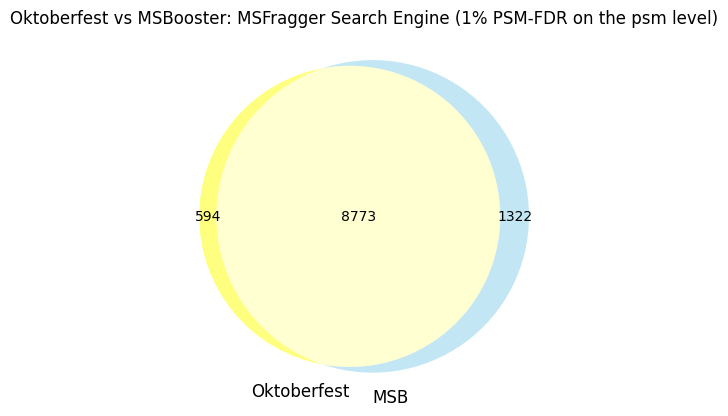

In [7]:
venn2([set(IGC_psm_OK_MSF['modi_peptide'].to_list()), 
       set(IGC_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)')

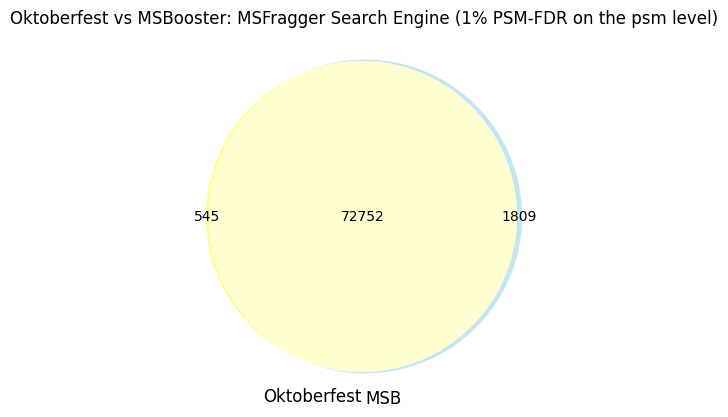

In [8]:
#Unfiltered
venn2([set(unOK_psm_IGC['modi_peptide'].to_list()), 
       set(unMSB_IGC_psm['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)")

### sprot_human

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on psm level)')

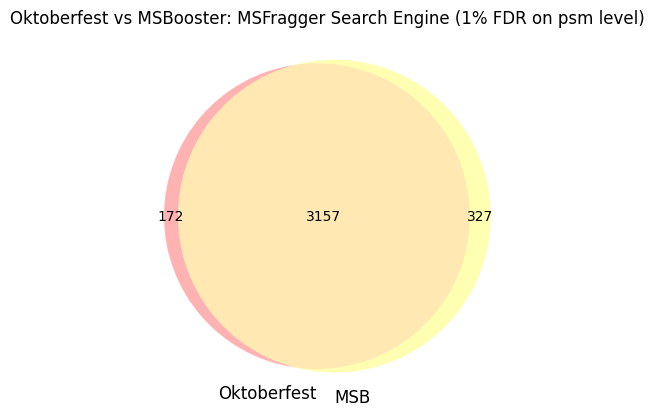

In [13]:
venn2([set(sprot_H_psm_OK_MSF['modi_peptide'].to_list()), 
       set(sprot_H_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red', 'yellow'),
       alpha = 0.3
     )
plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (100% FDR on psm level)')

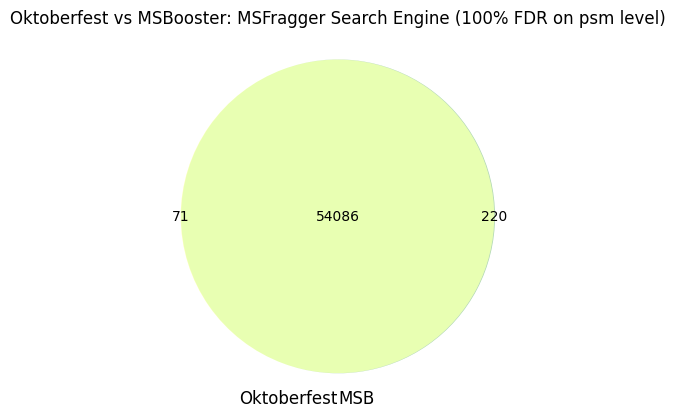

In [6]:
venn2([set(unOK_psm_sprot_H['modi_peptide'].to_list()), 
       set(unMSB_sprot_H_psm['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow',"green"),
       alpha = 0.3
     )
plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (100% FDR on psm level)")

Text(0.5, 1.0, 'FDR: Oktoberfest 1% vs MSBooster 100% (MSFragger Search Engine)')

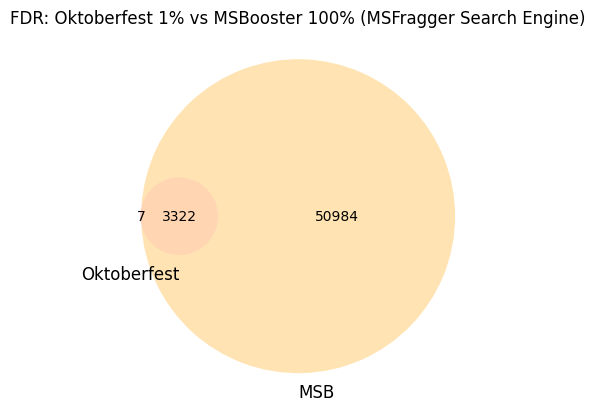

In [11]:
venn2([set(sprot_H_psm_OK_MSF['modi_peptide'].to_list()), 
       set(unMSB_sprot_H_psm['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red',"orange"),
       alpha = 0.3
     )
plt.title("FDR: Oktoberfest 1% vs MSBooster 100% (MSFragger Search Engine)")

Text(0.5, 1.0, 'FDR: Oktoberfest 100% vs MSBooster 1% (MSFragger Search Engine)')

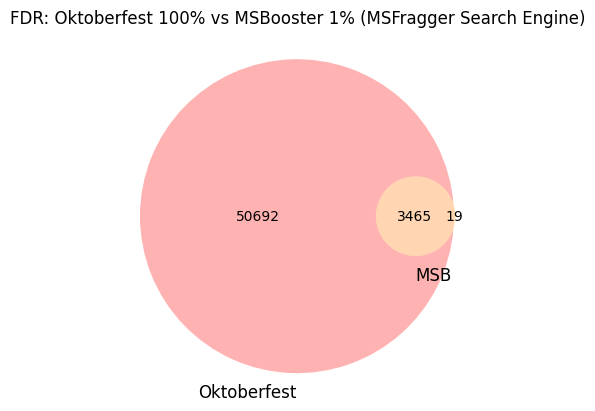

In [12]:
venn2([set(unOK_psm_sprot_H['modi_peptide'].to_list()), 
       set(sprot_H_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red',"orange"),
       alpha = 0.3
     )
plt.title("FDR: Oktoberfest 100% vs MSBooster 1% (MSFragger Search Engine)")

### sprot_bacteria_human

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on psm level)')

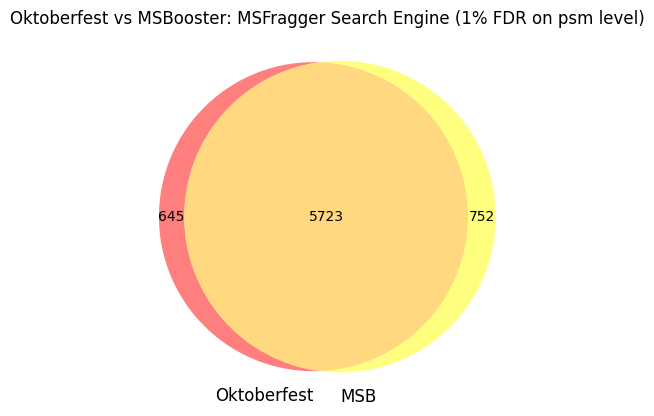

In [14]:
venn2([set(sprot_BH_psm_OK_MSF['modi_peptide'].to_list()), 
       set(sprot_BH_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red', 'yellow'),
       alpha = 0.5
     )
plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (100% FDR on psm level)')

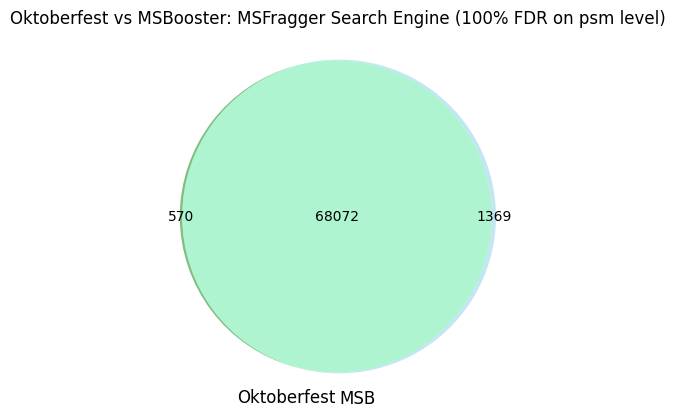

In [7]:
venn2([set(unOK_psm_sprot_BH['modi_peptide'].to_list()), 
       set(unMSB_sprot_BH_psm['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('green', 'skyblue'),
       alpha = 0.5
     )
plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (100% FDR on psm level)")

Text(0.5, 1.0, 'FDR: Oktoberfest 1% vs MSBooster 100% (MSFragger Search Engine)')

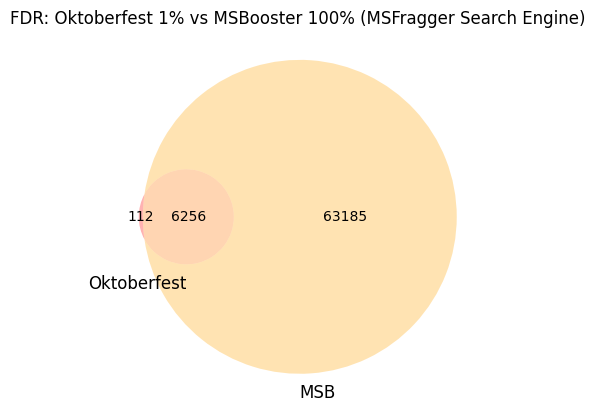

In [16]:
venn2([set(sprot_BH_psm_OK_MSF['modi_peptide'].to_list()), 
       set(unMSB_sprot_BH_psm['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red',"orange"),
       alpha = 0.3
     )
plt.title("FDR: Oktoberfest 1% vs MSBooster 100% (MSFragger Search Engine)")

Text(0.5, 1.0, 'FDR: Oktoberfest 100% vs MSBooster 1% (MSFragger Search Engine)')

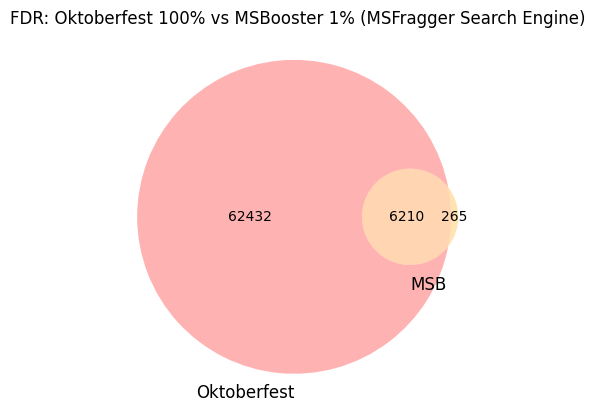

In [17]:
venn2([set(unOK_psm_sprot_BH['modi_peptide'].to_list()), 
       set(sprot_BH_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red',"orange"),
       alpha = 0.3
     )
plt.title("FDR: Oktoberfest 100% vs MSBooster 1% (MSFragger Search Engine)")

### sprot_all

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on psm level)')

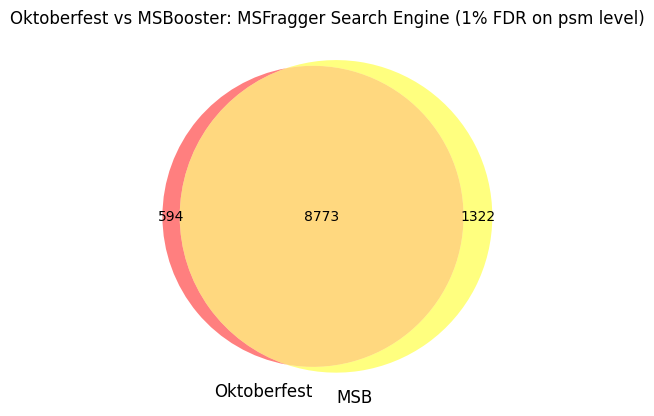

In [15]:
venn2([set(sprot_all_psm_OK_MSF['modi_peptide'].to_list()), 
       set(sprot_all_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red', 'yellow'),
       alpha = 0.5
     )
plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (100% FDR on psm level)')

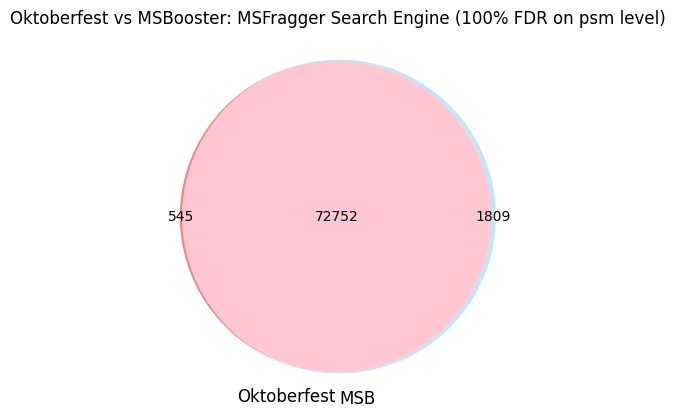

In [10]:
venn2([set(unOK_psm_sprot_all['modi_peptide'].to_list()), 
       set(unMSB_sprot_all_psm['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red', 'skyblue'),
       alpha = 0.5
     )
plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (100% FDR on psm level)")

Text(0.5, 1.0, 'FDR: Oktoberfest 1% vs MSBooster 100% (MSFragger Search Engine)')

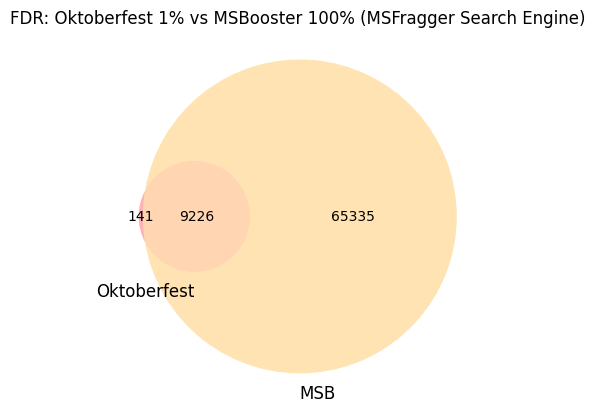

In [18]:
venn2([set(sprot_all_psm_OK_MSF['modi_peptide'].to_list()), 
       set(unMSB_sprot_all_psm['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red',"orange"),
       alpha = 0.3
     )
plt.title("FDR: Oktoberfest 1% vs MSBooster 100% (MSFragger Search Engine)")

Text(0.5, 1.0, 'FDR: Oktoberfest 100% vs MSBooster 1% (MSFragger Search Engine)')

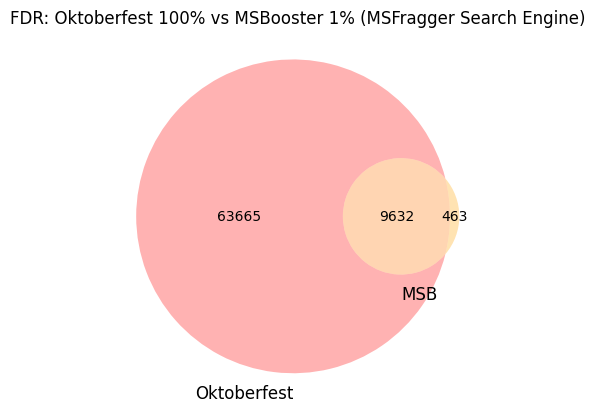

In [19]:
venn2([set(unOK_psm_sprot_all['modi_peptide'].to_list()), 
       set(sprot_all_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('red',"orange"),
       alpha = 0.3
     )
plt.title("FDR: Oktoberfest 100% vs MSBooster 1% (MSFragger Search Engine)")

## Different Search Engines:
MSBooster (MSFragger) vs MQ_OKtoberfest (Maxquant)

### A1101

Text(0.5, 1.0, 'Oktoberfest to MSBooster: Different Search Engines (1% PSM-FDR on the psm level)')

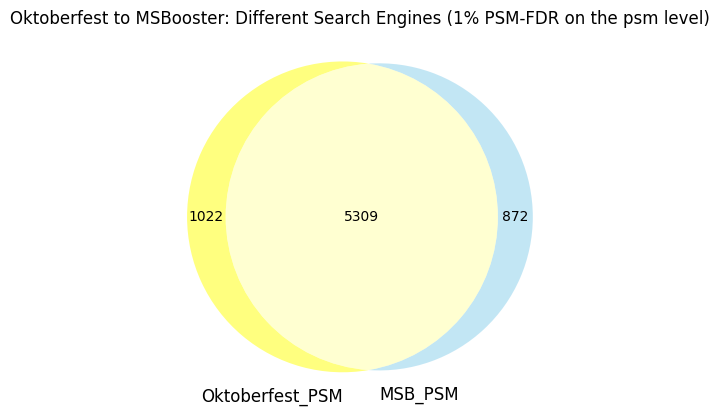

In [18]:
venn2([set(A1101_psm_OK_Max['modi_peptide'].to_list()), 
       set(A1101_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest_PSM', 'MSB_PSM'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )
plt.title("Oktoberfest to MSBooster: Different Search Engines (1% PSM-FDR on the psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster vs MS2Rescore: Different Search Engines (1% PSM-FDR on the psm level)')

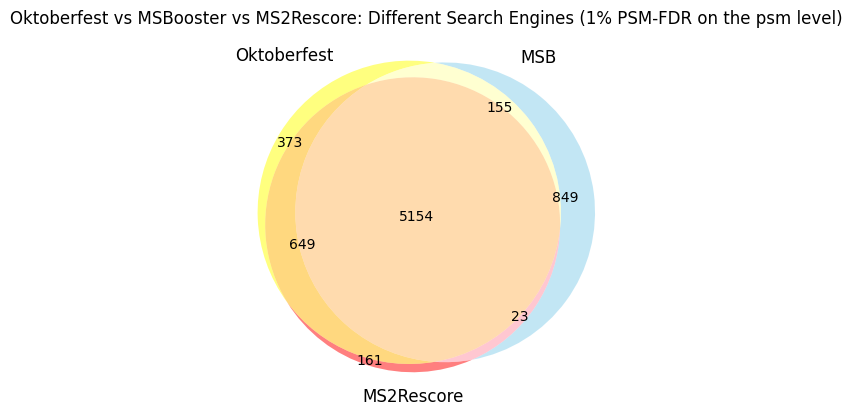

In [53]:
venn3([set(A1101_psm_OK_Max['modi_peptide'].to_list()), 
       set(A1101_psm_MSB['modi_peptide_2'].to_list()),
       set(HLA_MS2_A1101['peptide'].to_list())],
       set_labels=('Oktoberfest', 'MSB','MS2Rescore'),
       set_colors = ('yellow', 'skyblue','red'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster vs MS2Rescore: Different Search Engines (1% PSM-FDR on the psm level)")

### A3101

Text(0.5, 1.0, 'Oktoberfest to MSBooster: Different Search Engines (1% PSM-FDR on the psm level)')

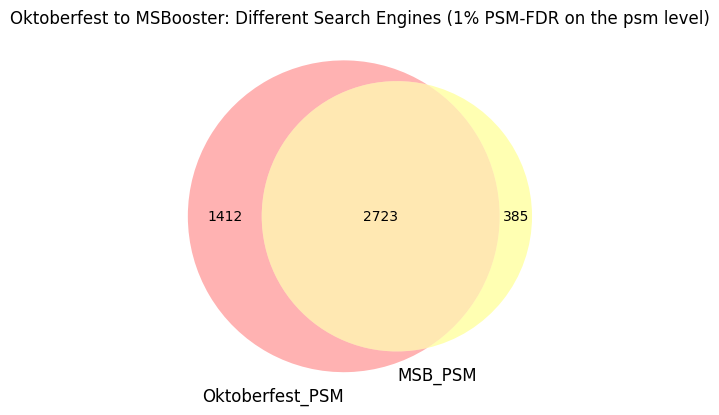

In [54]:
venn2([set(A3101_psm_OK_Max['modi_peptide'].to_list()), 
       set(A3101_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest_PSM', 'MSB_PSM'),
       set_colors = ('red', 'yellow'),
       alpha = 0.3
     )
plt.title("Oktoberfest to MSBooster: Different Search Engines (1% PSM-FDR on the psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster vs MS2Rescore: Different Search Engines (1% PSM-FDR on the psm level)')

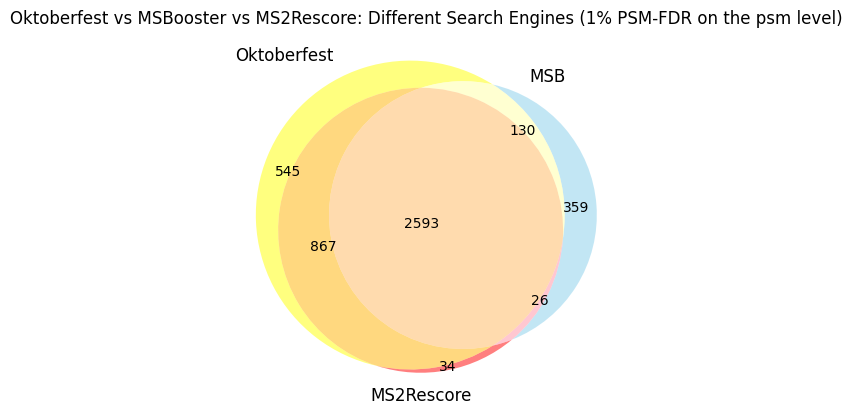

In [55]:
venn3([set(A3101_psm_OK_Max['modi_peptide'].to_list()), 
       set(A3101_psm_MSB['modi_peptide_2'].to_list()),
       set(HLA_MS2_A3101['peptide'].to_list())],
       set_labels=('Oktoberfest', 'MSB','MS2Rescore'),
       set_colors = ('yellow', 'skyblue','red'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster vs MS2Rescore: Different Search Engines (1% PSM-FDR on the psm level)")

### C1203

Text(0.5, 1.0, 'Oktoberfest to MSBooster: Different Search Engines (1% PSM-FDR on the psm level)')

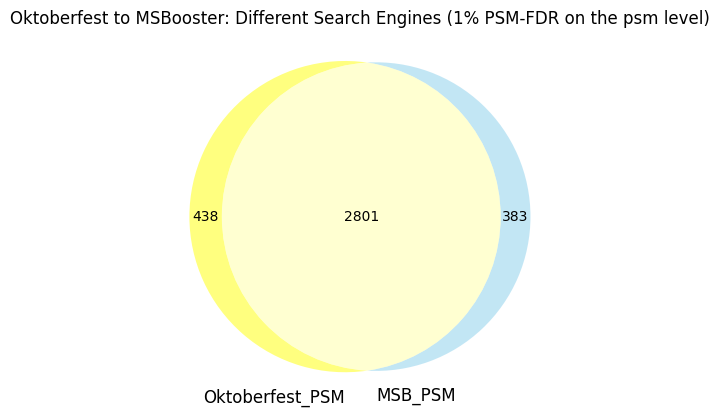

In [20]:
venn2([set(C1203_psm_OK_Max['modi_peptide'].to_list()), 
       set(C1203_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest_PSM', 'MSB_PSM'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )
plt.title("Oktoberfest to MSBooster: Different Search Engines (1% PSM-FDR on the psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster vs MS2Rescore: Different Search Engines (1% PSM-FDR on the psm level)')

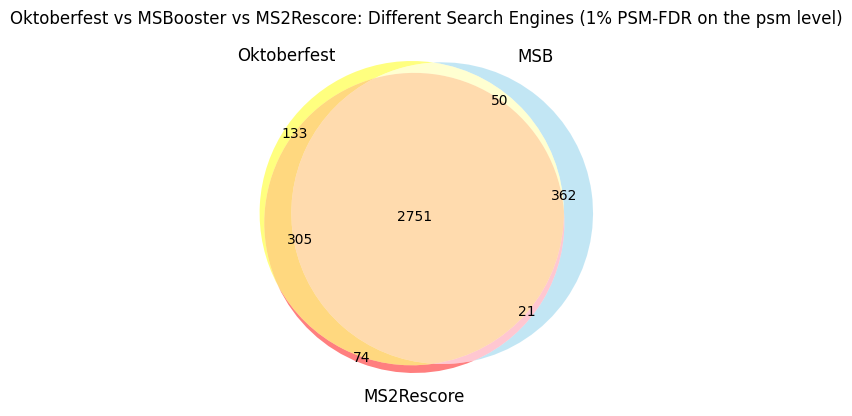

In [56]:
venn3([set(C1203_psm_OK_Max['modi_peptide'].to_list()), 
       set(C1203_psm_MSB['modi_peptide_2'].to_list()),
       set(HLA_MS2_C1203['peptide'].to_list())],
       set_labels=('Oktoberfest', 'MSB','MS2Rescore'),
       set_colors = ('yellow', 'skyblue','red'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster vs MS2Rescore: Different Search Engines (1% PSM-FDR on the psm level)")

### G0103

Text(0.5, 1.0, 'Oktoberfest to MSBooster: Different Search Engines (1% PSM-FDR on the psm level)')

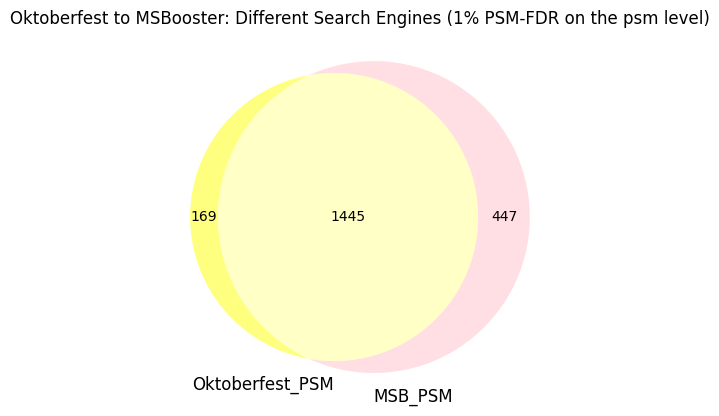

In [57]:
venn2([set(G0103_psm_OK_Max['modi_peptide'].to_list()), 
       set(G0103_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest_PSM', 'MSB_PSM'),
       set_colors = ('yellow', 'pink'),
       alpha = 0.5
     )
plt.title("Oktoberfest to MSBooster: Different Search Engines (1% PSM-FDR on the psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster vs MS2Rescore: Different Search Engines (1% PSM-FDR on the psm level)')

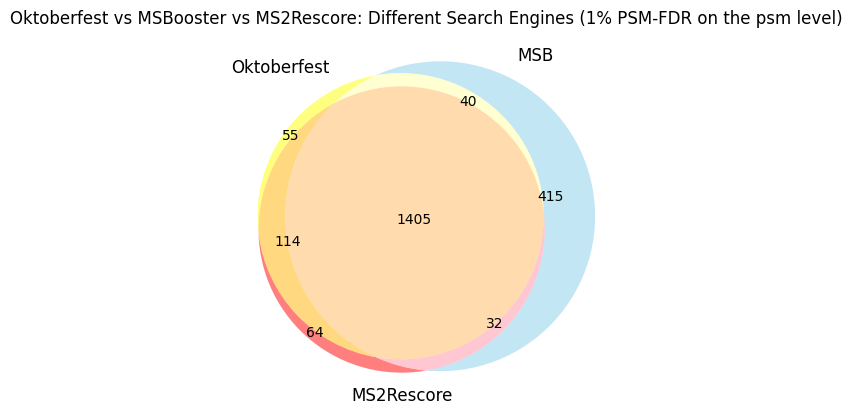

In [58]:
venn3([set(G0103_psm_OK_Max['modi_peptide'].to_list()), 
       set(G0103_psm_MSB['modi_peptide_2'].to_list()),
       set(HLA_MS2_G0103['peptide'].to_list())],
       set_labels=('Oktoberfest', 'MSB','MS2Rescore'),
       set_colors = ('yellow', 'skyblue','red'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster vs MS2Rescore: Different Search Engines (1% PSM-FDR on the psm level)")

## Unifying PSMid in MSB_MSF and OK_MSF

In [68]:
A1101_psm_MSB_uni = A1101_psm_MSB
A1101_psm_MSB_uni['PSMId_uni'] = A1101_psm_MSB_uni['PSMId'].apply(lambda x: '-'.join(x.split('.')[:2]))

A1101_psm_OK_MSF_uni = A1101_psm_OK_MSF
A1101_psm_OK_MSF_uni['PSMId_uni'] = A1101_psm_OK_MSF_uni['PSMId'].apply(lambda x: '-'.join(x.split('-')[:2]))

In [69]:
A3101_psm_MSB_uni = A3101_psm_MSB
A3101_psm_MSB_uni['PSMId_uni'] = A3101_psm_MSB_uni['PSMId'].apply(lambda x: '-'.join(x.split('.')[:2]))

A3101_psm_OK_MSF_uni = A3101_psm_OK_MSF
A3101_psm_OK_MSF_uni['PSMId_uni'] = A3101_psm_OK_MSF_uni['PSMId'].apply(lambda x: '-'.join(x.split('-')[:2]))

In [70]:
C1203_psm_MSB_uni = C1203_psm_MSB
C1203_psm_MSB_uni['PSMId_uni'] = C1203_psm_MSB_uni['PSMId'].apply(lambda x: '-'.join(x.split('.')[:2]))

C1203_psm_OK_MSF_uni = C1203_psm_OK_MSF
C1203_psm_OK_MSF_uni['PSMId_uni'] = C1203_psm_OK_MSF_uni['PSMId'].apply(lambda x: '-'.join(x.split('-')[:2]))

In [71]:
G0103_psm_MSB_uni = G0103_psm_MSB
G0103_psm_MSB_uni['PSMId_uni'] = G0103_psm_MSB_uni['PSMId'].apply(lambda x: '-'.join(x.split('.')[:2]))

G0103_psm_OK_MSF_uni = G0103_psm_OK_MSF
G0103_psm_OK_MSF_uni['PSMId_uni'] = G0103_psm_OK_MSF_uni['PSMId'].apply(lambda x: '-'.join(x.split('-')[:2]))

In [72]:
G0103_psm_OK_MSF_uni

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide,PSMId_uni
0,0,GN20170722_SK_HLA_G0103_R1_01-7917-ESGPSIVHRKC...,0.952827,0.000176,2.596400e-07,_.ESGPSIVHRKC[UNIMOD:4]F._,ESGPSIVHRKC[UNIMOD:4]F,ESGPSIVHRKCF,GN20170722_SK_HLA_G0103_R1_01-7917
1,1,GN20170722_SK_HLA_G0103_R2_02-7777-ESGPSIVHRKC...,0.890644,0.000176,6.226850e-07,_.ESGPSIVHRKC[UNIMOD:4]F._,ESGPSIVHRKC[UNIMOD:4]F,ESGPSIVHRKCF,GN20170722_SK_HLA_G0103_R2_02-7777
2,2,GN20170722_SK_HLA_G0103_R2_01-7777-ESGPSIVHRKC...,0.885902,0.000176,6.656410e-07,_.ESGPSIVHRKC[UNIMOD:4]F._,ESGPSIVHRKC[UNIMOD:4]F,ESGPSIVHRKCF,GN20170722_SK_HLA_G0103_R2_01-7777
3,3,GN20170722_SK_HLA_G0103_R1_01-8754-AQYEDIAQKSK...,0.733901,0.000176,5.647480e-06,_.AQYEDIAQKSKAEAE._,AQYEDIAQKSKAEAE,AQYEDIAQKSKAEAE,GN20170722_SK_HLA_G0103_R1_01-8754
4,4,GN20170722_SK_HLA_G0103_R1_02-5552-SELKNM[UNIM...,0.727305,0.000176,6.196600e-06,_.SELKNM[UNIMOD:35]QDM[UNIMOD:35]VED._,SELKNM[UNIMOD:35]QDM[UNIMOD:35]VED,SELKNMQDMVED,GN20170722_SK_HLA_G0103_R1_02-5552
...,...,...,...,...,...,...,...,...,...
20431,20431,GN20170722_SK_HLA_G0103_R2_02-29853-KVPFPLTL-2...,0.000535,0.009933,1.284070e-01,_.KVPFPLTL._,KVPFPLTL,KVPFPLTL,GN20170722_SK_HLA_G0103_R2_02-29853
20432,20432,GN20170722_SK_HLA_G0103_R1_01-24662-KIPSYITDL-...,0.000357,0.009933,1.286530e-01,_.KIPSYITDL._,KIPSYITDL,KIPSYITDL,GN20170722_SK_HLA_G0103_R1_01-24662
20433,20433,GN20170722_SK_HLA_G0103_R2_02-21508-GAPPDTLSL-...,0.000214,0.009933,1.288510e-01,_.GAPPDTLSL._,GAPPDTLSL,GAPPDTLSL,GN20170722_SK_HLA_G0103_R2_02-21508
20434,20434,GN20170722_SK_HLA_G0103_R2_01-4485-KLAAHDNLKL-...,0.000178,0.009933,1.289000e-01,_.KLAAHDNLKL._,KLAAHDNLKL,KLAAHDNLKL,GN20170722_SK_HLA_G0103_R2_01-4485


Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)')

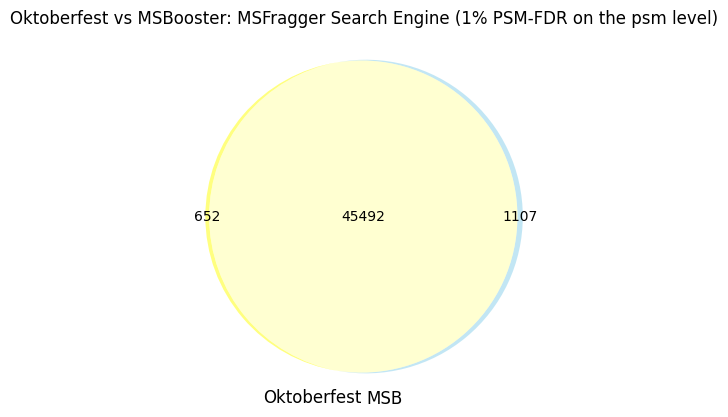

In [73]:
venn2([set(A1101_psm_OK_MSF_uni['PSMId_uni'].to_list()), 
       set(A1101_psm_MSB_uni['PSMId_uni'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)')

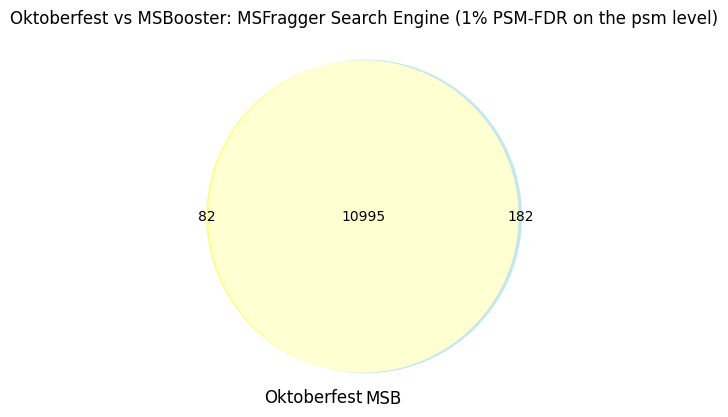

In [74]:
venn2([set(A3101_psm_OK_MSF_uni['PSMId_uni'].to_list()), 
       set(A3101_psm_MSB_uni['PSMId_uni'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)')

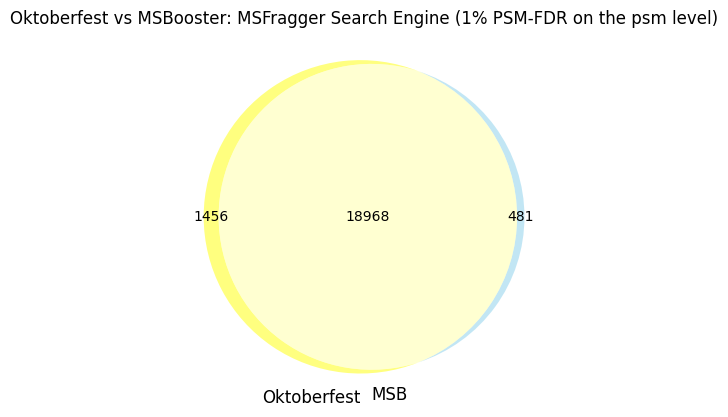

In [75]:
venn2([set(C1203_psm_OK_MSF_uni['PSMId_uni'].to_list()), 
       set(C1203_psm_MSB_uni['PSMId_uni'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)")

Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)')

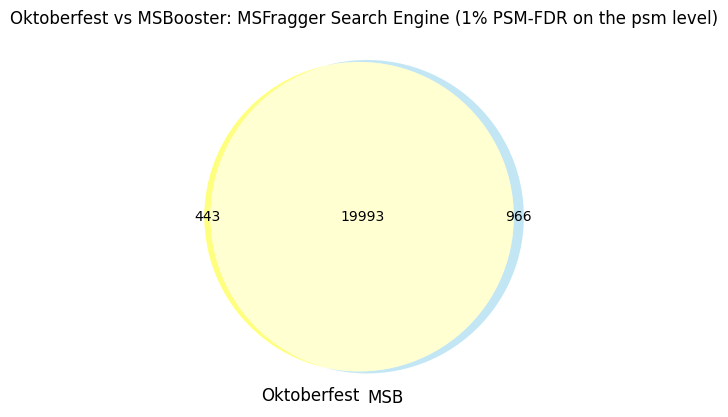

In [76]:
venn2([set(G0103_psm_OK_MSF_uni['PSMId_uni'].to_list()), 
       set(G0103_psm_MSB_uni['PSMId_uni'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% PSM-FDR on the psm level)")

## Merging datasets

In [77]:

A1101_psm_OK_MSF_uni.rename(columns={'modi_peptide': 'modi_peptide_2'}, inplace=True)
A1101_psm_OK_MSF_uni


,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide_2,PSMId_uni
0,0,AC20171011_Broad_HLA_A1101_R1_Rep02-3085-RVYDP...,2.055160,0.000171,6.901180e-08,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR,AC20171011_Broad_HLA_A1101_R1_Rep02-3085
1,1,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_01-121...,1.975620,0.000171,1.151810e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_01-12151
2,2,AC20171011_Broad_HLA_A1101_R1_Rep01-3121-RVYDP...,1.941970,0.000171,1.430560e-07,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR,AC20171011_Broad_HLA_A1101_R1_Rep01-3121
3,3,AC20171011_Broad_HLA_A1101_R2_Rep02-3055-RVYDP...,1.930920,0.000171,1.536090e-07,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR,AC20171011_Broad_HLA_A1101_R2_Rep02-3055
4,4,AC20171011_Broad_HLA_A1101_R1_Rep02-6653-ISDPT...,1.832800,0.000171,2.889660e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR,AC20171011_Broad_HLA_A1101_R1_Rep02-6653
...,...,...,...,...,...,...,...,...,...
46139,46139,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_01-899...,0.001919,0.009883,3.816920e-01,_.AVFRGRMSMK._,AVFRGRMSMK,AVFRGRMSMK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_01-8998
46140,46140,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_01-133...,0.000868,0.009947,3.848630e-01,_.GLTVPTSPK._,GLTVPTSPK,GLTVPTSPK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_01-13367
46141,46141,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-233...,0.000541,0.009947,3.858470e-01,_.VIPFTIKK._,VIPFTIKK,VIPFTIKK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-23364
46142,46142,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-816...,0.000470,0.009947,3.860620e-01,_.SISNSYVK._,SISNSYVK,SISNSYVK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-8169


In [78]:
A1101_merged = pd.merge (A1101_psm_MSB_uni, A1101_psm_OK_MSF_uni, how = 'inner', on = ['PSMId_uni','modi_peptide_2'])

In [79]:
A1101_merged

,Unnamed: 0_x,PSMId_x,score_x,q-value_x,posterior_error_prob_x,peptide_x,modi_peptide,modi_peptide_2,PSMId_uni,Unnamed: 0_y,PSMId_y,score_y,q-value_y,posterior_error_prob_y,peptide_y,proteinIds
0,0,AC20171011_Broad_HLA_A1101_R1_Rep01.7489.7489.3_1,1.723150,0.000274,3.649220e-07,Q.HSQGLGGHYADSYLK.R,HSQGLGGHYADSYLK,HSQGLGGHYADSYLK,AC20171011_Broad_HLA_A1101_R1_Rep01-7489,107,AC20171011_Broad_HLA_A1101_R1_Rep01-7489-HSQGL...,1.323650,0.000171,0.000008,_.HSQGLGGHYADSYLK._,HSQGLGGHYADSYLK
1,1,AC20171011_Broad_HLA_A1101_R1_Rep01.3860.3860.3_1,1.649400,0.000274,6.621350e-07,L.RVFEDESGKHWSK.S,RVFEDESGKHWSK,RVFEDESGKHWSK,AC20171011_Broad_HLA_A1101_R1_Rep01-3860,123,AC20171011_Broad_HLA_A1101_R1_Rep01-3860-RVFED...,1.309700,0.000171,0.000008,_.RVFEDESGKHWSK._,RVFEDESGKHWSK
2,2,AC20171011_Broad_HLA_A1101_R1_Rep01.9057.9057.3_1,1.625860,0.000274,8.008500e-07,W.TYDDATKTFTVTEK.P,TYDDATKTFTVTEK,TYDDATKTFTVTEK,AC20171011_Broad_HLA_A1101_R1_Rep01-9057,481,AC20171011_Broad_HLA_A1101_R1_Rep01-9057-TYDDA...,1.158400,0.000171,0.000022,_.TYDDATKTFTVTEK._,TYDDATKTFTVTEK
3,3,AC20171011_Broad_HLA_A1101_R1_Rep01.7206.7206.3_1,1.596420,0.000274,1.015860e-06,L.RVFANNADQQLVK.K,RVFANNADQQLVK,RVFANNADQQLVK,AC20171011_Broad_HLA_A1101_R1_Rep01-7206,7964,AC20171011_Broad_HLA_A1101_R1_Rep01-7206-RVFAN...,0.736615,0.000326,0.000293,_.RVFANNADQQLVK._,RVFANNADQQLVK
4,4,AC20171011_Broad_HLA_A1101_R1_Rep01.4549.4549.3_1,1.584870,0.000274,1.115240e-06,N.RAAPGAEFAPNK.R,RAAPGAEFAPNK,RAAPGAEFAPNK,AC20171011_Broad_HLA_A1101_R1_Rep01-4549,23130,AC20171011_Broad_HLA_A1101_R1_Rep01-4549-RAAPG...,0.524684,0.000448,0.001265,_.RAAPGAEFAPNK._,RAAPGAEFAPNK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45356,59194,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.130...,0.015786,0.008826,1.982490e-01,K.ASIRTFVPK.N,ASIRTFVPK,ASIRTFVPK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-13051,45640,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-130...,0.066342,0.006529,0.194970,_.ASIRTFVPK._,ASIRTFVPK
45357,59204,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.179...,0.004841,0.009135,2.118950e-01,S.LFHPSNVEM.L,LFHPSNVEM,LFHPSNVEM,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-17948,44597,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-179...,0.152428,0.004349,0.069425,_.LFHPSNVEM._,LFHPSNVEM
45358,59205,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.189...,0.004738,0.009135,2.120250e-01,R.AVQEFGLARFK.S,AVQEFGLARFK,AVQEFGLARFK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-18911,45246,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-189...,0.105591,0.005591,0.119859,_.AVQEFGLARFK._,AVQEFGLARFK
45359,59210,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.126...,0.000000,0.009454,2.181340e-01,V.PLPISHK.R,PLPISHK,PLPISHK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-12638,45503,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-126...,0.082249,0.006131,0.159730,_.PLPISHK._,PLPISHK


In [80]:
A1101_merged.tail(20)

,Unnamed: 0_x,PSMId_x,score_x,q-value_x,posterior_error_prob_x,peptide_x,modi_peptide,modi_peptide_2,PSMId_uni,Unnamed: 0_y,PSMId_y,score_y,q-value_y,posterior_error_prob_y,peptide_y,proteinIds
45341,59159,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.189...,0.056898,0.007233,0.152632,G.RVPDFILEK.I,RVPDFILEK,RVPDFILEK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-18964,34706,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-189...,0.407453,0.001089,0.004253,_.RVPDFILEK._,RVPDFILEK
45342,59160,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.281...,0.054714,0.007561,0.154836,G.GTMEWIMIK.V,GTMEWIMIK,GTMEWIMIK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-28169,33219,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-281...,0.424618,0.000928,0.003531,_.GTMEWIMIK._,GTMEWIMIK
45343,59161,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.629...,0.052091,0.007883,0.157515,A.ATMKPHPTVQK.Q,ATMKPHPTVQK,ATMKPHPTVQK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-6292,43616,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-629...,0.207090,0.003344,0.037432,_.ATMKPHPTVQK._,ATMKPHPTVQK
45344,59162,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.189...,0.051789,0.007883,0.157826,G.RVPLDPLIGK.N,RVPLDPLIGK,RVPLDPLIGK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-18943,43765,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-189...,0.200315,0.003473,0.040345,_.RVPLDPLIGK._,RVPLDPLIGK
45345,59164,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.851...,0.051262,0.007883,0.158369,G.STMERWGQK.Y,STMERWGQK,STMERWGQK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-8514,45222,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-851...,0.107184,0.005550,0.117585,_.STMERWGQK._,STMERWGQK
45346,59165,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.152...,0.049461,0.007883,0.160235,S.IFDGRVVAK.L,IFDGRVVAK,IFDGRVVAK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-15200,36630,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-152...,0.381515,0.001277,0.005621,_.IFDGRVVAK._,IFDGRVVAK
45347,59168,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.917...,0.046229,0.008037,0.163628,W.SIMKWNRER.R,SIMKWNRER,SIMKWNRER,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-9176,41885,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-917...,0.274603,0.002313,0.017724,_.SIMKWNRER._,SIMKWNRER
45348,59171,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.805...,0.045311,0.008037,0.164600,P.GTQRFELHK.R,GTQRFELHK,GTQRFELHK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-8057,44346,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-805...,0.169131,0.003967,0.057333,_.GTQRFELHK._,GTQRFELHK
45349,59177,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.108...,0.036004,0.008191,0.174714,M.RIFAPNHVVAK.S,RIFAPNHVVAK,RIFAPNHVVAK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-10811,45872,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-108...,0.034114,0.008000,0.283880,_.RIFAPNHVVAK._,RIFAPNHVVAK
45350,59178,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.252...,0.035773,0.008191,0.174971,L.RIMLAEILTTK.V,RIMLAEILTTK,RIMLAEILTTK,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-25213,45079,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-252...,0.118489,0.005234,0.102786,_.RIMLAEILTTK._,RIMLAEILTTK
